In [ ]:
## GROUP 11
## RF Model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('C:/Users/aditi/Downloads/archive/train.csv')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
df['target'] = df['target'].astype('object')
df['sex'] = df['target'].astype('object')
##df_num= df.select_dtypes(exclude='object')
df_num = df[['sex']]
df_obj = df.drop(columns=['sex'])
##df_num = [['']]

#df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1025 non-null   object
dtypes: object(1)
memory usage: 8.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   cp        1025 non-null   int64  
 2   trestbps  1025 non-null   int64  
 3   chol      1025 non-null   int64  
 4   fbs       1025 non-null   int64  
 5   restecg   1025 non-null   int64  
 6   thalach   1025 non-null   int64  
 7   exang     1025 non-null   int64  
 8   oldpeak   1025 non-null   float64
 9   slope     1025 non-null   int64  
 10  ca        1025 non-null   int64  
 11  thal      1025 non-null   int64  
 12  target    1025 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage:

target_1
True     526
False    499
Name: count, dtype: int64


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target_1
0,52,0,125,212,0,1,168,0,1.0,2,2,3,False
1,53,0,140,203,1,0,155,1,3.1,0,0,3,False
2,70,0,145,174,0,1,125,1,2.6,0,0,3,False
3,61,0,148,203,0,1,161,0,0.0,2,1,3,False
4,62,0,138,294,1,1,106,0,1.9,1,3,2,False


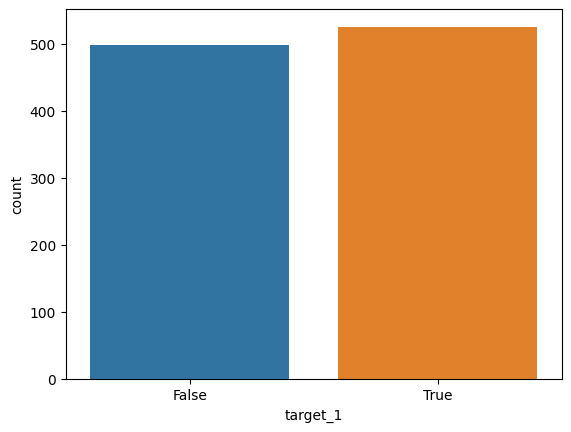

In [4]:
df_obj= pd.get_dummies(df_obj, drop_first=True)
print(df_obj['target_1'].value_counts())
sns.countplot(data=df_obj, x='target_1')
df_obj.head()

In [5]:
attr = df_obj.drop('target_1', axis=1)
print(attr)
target = df_obj['target_1']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=7)

      age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0      52   0       125   212    0        1      168      0      1.0      2   
1      53   0       140   203    1        0      155      1      3.1      0   
2      70   0       145   174    0        1      125      1      2.6      0   
3      61   0       148   203    0        1      161      0      0.0      2   
4      62   0       138   294    1        1      106      0      1.9      1   
...   ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   
1020   59   1       140   221    0        1      164      1      0.0      2   
1021   60   0       125   258    0        0      141      1      2.8      1   
1022   47   0       110   275    0        0      118      1      1.0      1   
1023   50   0       110   254    0        0      159      0      0.0      2   
1024   54   0       120   188    0        1      113      0      1.4      1   

      ca  thal  
0      2     3  
1      0     3  


In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=8)


In [7]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

Accuracy= 0.9772727272727273
[[141   0]
 [  7 160]]
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       141
        True       1.00      0.96      0.98       167

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [9]:
# Export the first three decision trees from the forest
## requires graphviz
# for i in range(3):
#     tree = rf.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)

In [10]:

# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")
 

Mean Decrease Accuracy[0.09724877 0.15796457 0.07552128 0.08129702 0.00983885 0.02563517
 0.11593675 0.06569891 0.11896243 0.04916112 0.1107382  0.09199693]

Mean Decrease GINI= [0.04862202 0.07897844 0.03775881 0.04064653 0.00491918 0.01281696
 0.05796555 0.03284786 0.05947832 0.02457937 0.05536641 0.04599623]


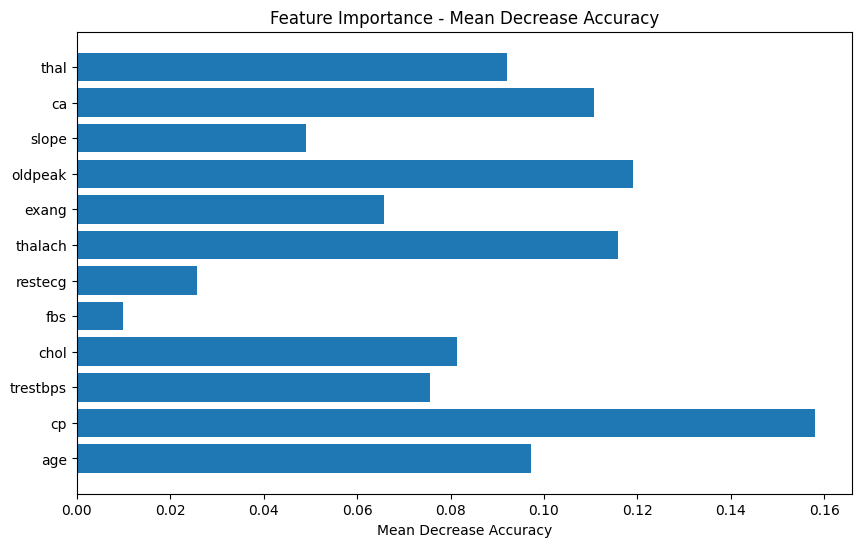

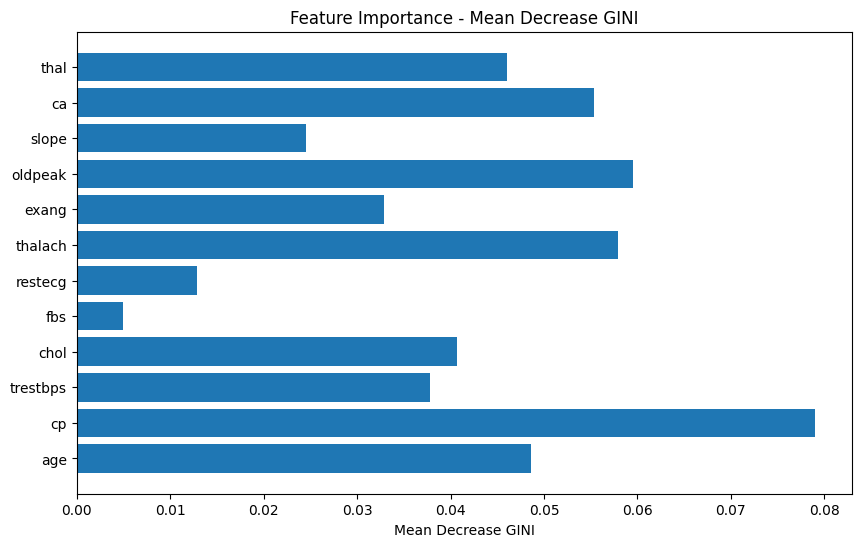

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [12]:

feature_scores = pd.Series(model.feature_importances_, index=attr_train.columns).sort_values(ascending=False)

print(feature_scores)

cp          0.157965
oldpeak     0.118962
thalach     0.115937
ca          0.110738
age         0.097249
thal        0.091997
chol        0.081297
trestbps    0.075521
exang       0.065699
slope       0.049161
restecg     0.025635
fbs         0.009839
dtype: float64
